# Montecarlo aproximated function



In [1]:
import sys
sys.path.append('../')  # Enable importing from `src` folder

In [2]:
%matplotlib inline
from collections import defaultdict
from typing import List

import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

import gym

import src.agents as agents
import src.episode as episode
import src.environment as environment
import src.aux_plots as aux_plots

In [3]:
def print_result(i, scores, total_reward, score):
    if i % 10 == 0:
        print(f"Run [{i:4}] - Total reward: {total_reward:7.2f} Mean scores: {sum(scores) / len(scores):.2f} Means Scores[:-10]: {sum(scores[-10:]) / len(scores[-10:]):5.2f} Score: {score:2} ")

In [6]:
RAM_mask = [
      14  # Chicken Y
    , 16  # Chicken Lane Collide
    , 108, 109, 110, 111, 112, 113, 114, 115, 116, 117  # Car X Coords
]

In [7]:
def reduce_state(ob):
    # Doesn't matter where we were hit
    ob[16] = 1 if ob[16] != 255 else 0

    # Reduce chicken y-position
    ob[14] = ob[14] // 3

    for b in range(108, 118):
        # The chicken is in the x-posistion ~49
        if ob[b] < 20 or ob[b] > 80:
            # We don't need to represent cars far from the chicken
            ob[b] = 0
        else:
            # Reduce the cars x-positions sample space
            ob[b] = ob[b] // 3

    return ob

# Reward Policy

In [8]:
def reward_policy(reward, ob, action):
    if reward == 1:
        reward = reward_policy.REWARD_IF_CROSS
    elif ob[16] == 1:  # Collision!
        reward = reward_policy.REWARD_IF_COLISION
    elif action != 1:  # Don't incentivate staying still
        reward = reward_policy.REWARD_IF_STILL

    return reward

# Hyper Parameters

In [10]:
GAMMA = 0.99
AVAILABLE_ACTIONS = 2
N0 = 2.5

reward_policy.REWARD_IF_CROSS = 50
reward_policy.REWARD_IF_COLISION = -1
reward_policy.REWARD_IF_STILL = -0.1

# MonteCarlo

In [4]:
env, initial_state = environment.get_env()

In [11]:
agent = agents.MonteCarloControl(gamma=GAMMA, available_actions=AVAILABLE_ACTIONS, N0=N0)

In [12]:
def MonteCarloES(RAM_mask: List[int], render: bool=False):
    epi = episode.generate_episode(env, reduce_state=reduce_state, reward_policy=reward_policy, agent=agent, RAM_mask=RAM_mask, render=render)
    return agent.update_policy(epi)

In [18]:
import pickle

In [25]:
def saveHistory(config,scores,total_rewards):
    base="history/"
    with open(base+"scores_"+config+".pickle", 'wb') as handle:
        pickle.dump(scores, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    with open(base+"total_rewards_"+config+".pickle", 'wb') as handle:
        pickle.dump(total_rewards, handle, protocol=pickle.HIGHEST_PROTOCOL)    
        
def loadHistory(fileDir):
    with open(fileDir, 'rb') as handle:
        data = pickle.load(handle)
        return data

In [13]:
%%time
MonteCarloES(RAM_mask=RAM_mask, render=False)

CPU times: user 2.67 s, sys: 15.5 ms, total: 2.69 s
Wall time: 2.7 s


(13, 452.8999999999921)

In [14]:
scores = []
total_rewards = []

In [15]:
%%time

n_runs = 2500

for i in range(n_runs):
    render = i % 201 == 200

    score, total_reward = MonteCarloES(RAM_mask=RAM_mask, render=render)

    scores.append(score)
    total_rewards.append(total_reward)

    print_result(i, scores, total_reward, score)

Run [   0] - Total reward:  464.60 Mean scores: 13.00 Means Scores[:-10]: 13.00 Score: 13 
Run [  10] - Total reward:  443.10 Mean scores: 11.91 Means Scores[:-10]: 11.80 Score: 13 
Run [  20] - Total reward:  450.00 Mean scores: 11.95 Means Scores[:-10]: 12.00 Score: 13 
Run [  30] - Total reward:  459.10 Mean scores: 12.06 Means Scores[:-10]: 12.30 Score: 13 
Run [  40] - Total reward:  464.70 Mean scores: 11.95 Means Scores[:-10]: 11.60 Score: 13 
Run [  50] - Total reward:  457.90 Mean scores: 12.00 Means Scores[:-10]: 12.20 Score: 13 
Run [  60] - Total reward:  400.60 Mean scores: 12.00 Means Scores[:-10]: 12.00 Score: 12 
Run [  70] - Total reward:  559.50 Mean scores: 12.06 Means Scores[:-10]: 12.40 Score: 15 
Run [  80] - Total reward:  285.40 Mean scores: 12.00 Means Scores[:-10]: 11.60 Score: 10 
Run [  90] - Total reward:  294.50 Mean scores: 12.01 Means Scores[:-10]: 12.10 Score: 10 
Run [ 100] - Total reward:  407.00 Mean scores: 12.08 Means Scores[:-10]: 12.70 Score: 12 

Run [ 910] - Total reward:  458.40 Mean scores: 13.07 Means Scores[:-10]: 13.80 Score: 13 
Run [ 920] - Total reward:  622.70 Mean scores: 13.08 Means Scores[:-10]: 14.00 Score: 16 
Run [ 930] - Total reward:  576.40 Mean scores: 13.08 Means Scores[:-10]: 13.30 Score: 15 
Run [ 940] - Total reward:  509.20 Mean scores: 13.09 Means Scores[:-10]: 13.90 Score: 14 
Run [ 950] - Total reward:  458.20 Mean scores: 13.09 Means Scores[:-10]: 13.00 Score: 13 
Run [ 960] - Total reward:  413.70 Mean scores: 13.09 Means Scores[:-10]: 13.30 Score: 12 
Run [ 970] - Total reward:  516.90 Mean scores: 13.10 Means Scores[:-10]: 13.30 Score: 14 
Run [ 980] - Total reward:  406.20 Mean scores: 13.10 Means Scores[:-10]: 13.40 Score: 12 
Run [ 990] - Total reward:  465.80 Mean scores: 13.11 Means Scores[:-10]: 13.90 Score: 13 
Run [1000] - Total reward:  523.20 Mean scores: 13.11 Means Scores[:-10]: 13.50 Score: 14 
Run [1010] - Total reward:  627.60 Mean scores: 13.13 Means Scores[:-10]: 14.90 Score: 16 

Run [1820] - Total reward:  520.00 Mean scores: 13.20 Means Scores[:-10]: 13.40 Score: 14 
Run [1830] - Total reward:  461.40 Mean scores: 13.20 Means Scores[:-10]: 13.00 Score: 13 
Run [1840] - Total reward:  353.90 Mean scores: 13.20 Means Scores[:-10]: 12.90 Score: 11 
Run [1850] - Total reward:  461.10 Mean scores: 13.20 Means Scores[:-10]: 13.10 Score: 13 
Run [1860] - Total reward:  462.70 Mean scores: 13.20 Means Scores[:-10]: 13.80 Score: 13 
Run [1870] - Total reward:  464.80 Mean scores: 13.20 Means Scores[:-10]: 13.20 Score: 13 
Run [1880] - Total reward:  574.10 Mean scores: 13.20 Means Scores[:-10]: 13.60 Score: 15 
Run [1890] - Total reward:  565.50 Mean scores: 13.20 Means Scores[:-10]: 13.20 Score: 15 
Run [1900] - Total reward:  517.10 Mean scores: 13.20 Means Scores[:-10]: 12.80 Score: 14 
Run [1910] - Total reward:  464.30 Mean scores: 13.20 Means Scores[:-10]: 13.70 Score: 13 
Run [1920] - Total reward:  453.80 Mean scores: 13.20 Means Scores[:-10]: 13.20 Score: 13 

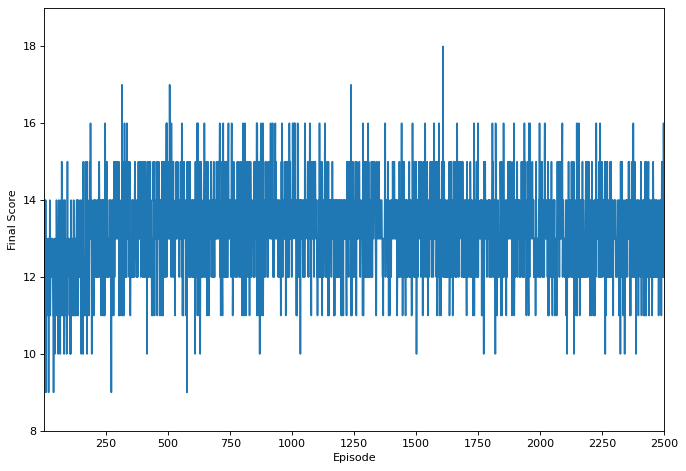

In [21]:
aux_plots.plot_scores(scores)

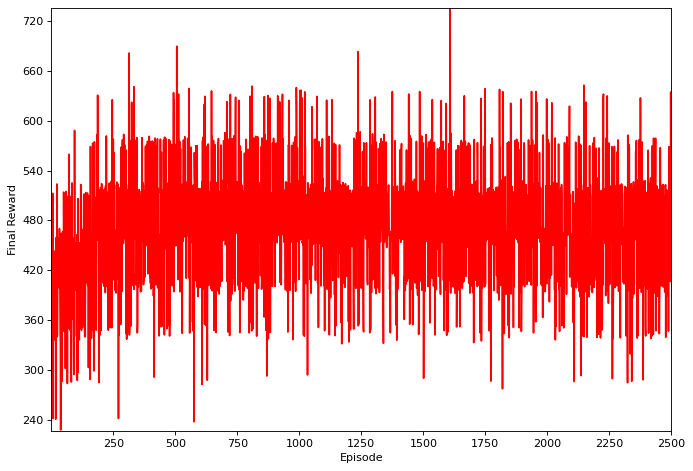

In [22]:
aux_plots.plot_rewards(total_rewards)

In [24]:
saveHistory("Episode2500",scores,total_rewards)

[13,
 14,
 13,
 11,
 10,
 14,
 9,
 11,
 12,
 11,
 13,
 11,
 12,
 12,
 12,
 12,
 13,
 9,
 13,
 13,
 13,
 12,
 14,
 11,
 11,
 12,
 12,
 13,
 13,
 12,
 13,
 12,
 13,
 12,
 12,
 11,
 11,
 9,
 11,
 12,
 13,
 13,
 10,
 12,
 12,
 12,
 13,
 11,
 12,
 14,
 13,
 11,
 11,
 12,
 12,
 12,
 10,
 12,
 14,
 14,
 12,
 11,
 13,
 12,
 10,
 13,
 13,
 14,
 12,
 11,
 15,
 12,
 11,
 11,
 11,
 13,
 12,
 12,
 14,
 10,
 10,
 11,
 14,
 14,
 11,
 12,
 13,
 12,
 12,
 12,
 10,
 12,
 13,
 15,
 13,
 12,
 12,
 13,
 13,
 12,
 12,
 11,
 12,
 13,
 10,
 12,
 10,
 14,
 13,
 12,
 12,
 11,
 11,
 13,
 12,
 12,
 11,
 12,
 14,
 12,
 11,
 11,
 13,
 12,
 13,
 11,
 13,
 11,
 12,
 13,
 14,
 14,
 13,
 14,
 11,
 12,
 11,
 12,
 14,
 12,
 13,
 13,
 13,
 13,
 12,
 14,
 12,
 13,
 12,
 10,
 12,
 14,
 13,
 13,
 12,
 12,
 10,
 15,
 13,
 12,
 12,
 11,
 11,
 12,
 12,
 11,
 15,
 13,
 13,
 12,
 14,
 13,
 10,
 15,
 12,
 14,
 12,
 12,
 13,
 12,
 11,
 13,
 13,
 13,
 15,
 13,
 16,
 14,
 13,
 14,
 12,
 10,
 14,
 13,
 13,
 11,
 11,
 12,
 12,
 11,
 14